In [1]:
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

### 데이터 불러오기 -> 쿼리
conn = sqlite3.connect('webtoon_comments.db')
cursor = conn.cursor()
query = """
SELECT * FROM Comments
"""
df = pd.read_sql_query(query, conn)
conn.close()


### df에 코멘트만 컬럼 추가
def extract_comment_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    content = soup.find('span', class_='u_cbox_contents')
    return content.text.strip() if content else None

df['CommentContent'] = df['CommentLi'].apply(extract_comment_content)


### 특수문자 제거 + 토크나이즈 => 통스트링으로 새로운 컬럼
okt = Okt()
def ko_text_process(text):
    if text == None:
        return ' '
    cleaned_text = re.sub(r'[^가-힣\s]', ' ', text).replace('\n', ' ')
    tokens = okt.morphs(cleaned_text)
    return ' '.join(tokens)

df['TokenizedComment'] = df['CommentContent'].apply(ko_text_process)



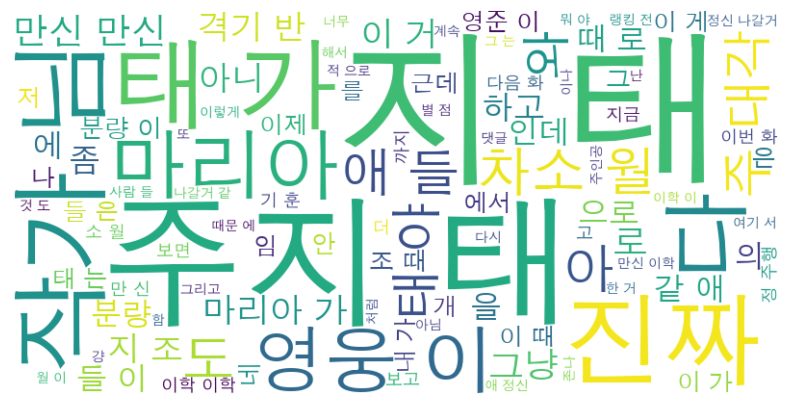

In [11]:
text_for_wordcloud = ' '.join(df['TokenizedComment'])
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', max_words = 100, width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
len(text_for_wordcloud)

3012399

In [8]:
text_for_wordcloud[:1000]

'격기 반 잼있냐 이제 볼려고 하는데 화 부터 재미 없는데 계속 봐야 되나 아니다 시보 니까 어깨 에 문신 지현 이 멀쩡한 여고생 으로 살 고 있는데 그 앞 에 흑 지 태 나타나서 아빠 죽여 버리면 어떡하지 계속 정 주행 하 며 느낀 점 잦은 지각 과 분량 미달 로 욕 을 많이 먹긴 했지만 탄탄한 스토리 와 자연스러운 개그 요소 들 그리고 그 사이 에 끼워 넣은 떡밥 들 까지 거의 완벽하게 회수 했다 거기 에 시즌 초반 지 태의 흑화 가 시작 되기 직전 독백 장면 에서 고뇌 하던 문제 가 스토리 가 진행 되며 점점 심화 되고 그 에 맞춰 연출 이나 격투씬 의 잔인성 도 극화 되는 모습 을 보이는데 호걸 의 등장 과 마지막 화 호걸 이 지 태 에게 독백 하 듯이 말 하는 장면 으로 정신 적 으로 심하게 망가진 지 태 가 회복할 수 있다는 작은 가능성 즉 개연 성 까지 열어주었다 그림 또한 네 웹 뿐 만 아니라 그 어떤 플랫폼 에서도 이렇게 다양한 구도 로 그림 을 완벽하게 그릴 수 있는 작가 는 몇 없다 물론 질뿍질뿍 과 스피 오스 피오 처럼 독자 들 을 농락 하며 장기 휴재 때리고 헬스 처 할 때 는 화가 많이 났지만 어쩌면 우리 의 욕심 이 이학 내면 에 잠들어있던 원숭이 카카 를 깨운 게 아닐까 싶기도 한다 항상 감사하면서 살자 이 제보 면 역시 넌 쓸모 가 없어 라는 대사도 망상 인지 진짜 인지 모르겠네 너무 비약 인가 이 제보 니 동원 이 마리아 플라잉 니 킥 맞고 멀쩡했었네 격붕이들 집합 대 기각 각 어라 봤던거네 정 주행 간다 지금 보 니까 주 대각 은 주지 태 여동생 이 재능 이 있다거나 해서 데려간게 아니라 주 대각 이 경기 중 에 죽인 선수 엄마 가 찾아온 걸 집 까지 데려가서 지 아내 가 죽게 된 것 에 대한 책임 이 주지 태 한테 있다고 생각 해서 지 태만 두고 여동생 데리 고 간 것 같음 여동생 멀쩡히 살아있을 것 같은디 만 신 이 될 남자 의 첫 발자국 정 주행 번째 휴재 보고 정 주행 하러 온 대 깨학 은 개추 지금 격 처음 보는 사람

In [16]:
from collections import Counter
Counter(text_for_wordcloud.split())['']

15901

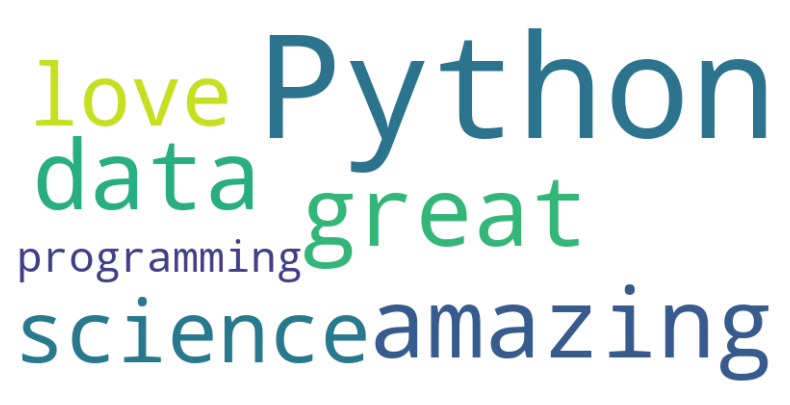

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 입력 문자열
text = "Python is amazing. Python is great for data science. I love Python programming."

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
